In [29]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score

In [30]:
data = pd.read_csv(r'''C:\Users\hp\Downloads\archive\healthcare-dataset-stroke-data.csv''')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
data.shape

(5110, 12)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [33]:
data.drop("id",inplace=True,axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [34]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

In [35]:
print("Number of Missing Values in our data set\n")
missing_data = data.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_data)

Number of Missing Values in our data set



,Variable,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,201
9,smoking_status,0


In [36]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)
#Checking Missing Values after imputing
display(data.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1))

,Variables,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,0
9,smoking_status,0


In [37]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [38]:
data.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [39]:
categorical = list(data.dtypes[data.dtypes == 'object'].index)
categorical

for col in categorical:
    data[col] = data[col].str.lower().str.replace(" ", "_")
    
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1


In [40]:
data.drop(data.loc[data['smoking_status']=='unknown'].index, inplace=True)

# data.drop(data.loc[data['gender']=='Other'].index, inplace=True)
# data.shape
data[data["gender"]=="Other"]
data=data.drop(3116,axis=0)
data.iloc[3114:3118,:]
index=[i for i in range(data.shape[0])]
data.index=index
data.iloc[3114:3118,:]
data.shape

(3565, 11)

In [41]:
data.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3560,female,57.0,0,0,yes,private,rural,77.93,21.700000,never_smoked,0
3561,female,80.0,1,0,yes,private,urban,83.75,28.893237,never_smoked,0
3562,female,81.0,0,0,yes,self-employed,urban,125.20,40.000000,never_smoked,0
3563,female,35.0,0,0,yes,self-employed,rural,82.99,30.600000,never_smoked,0


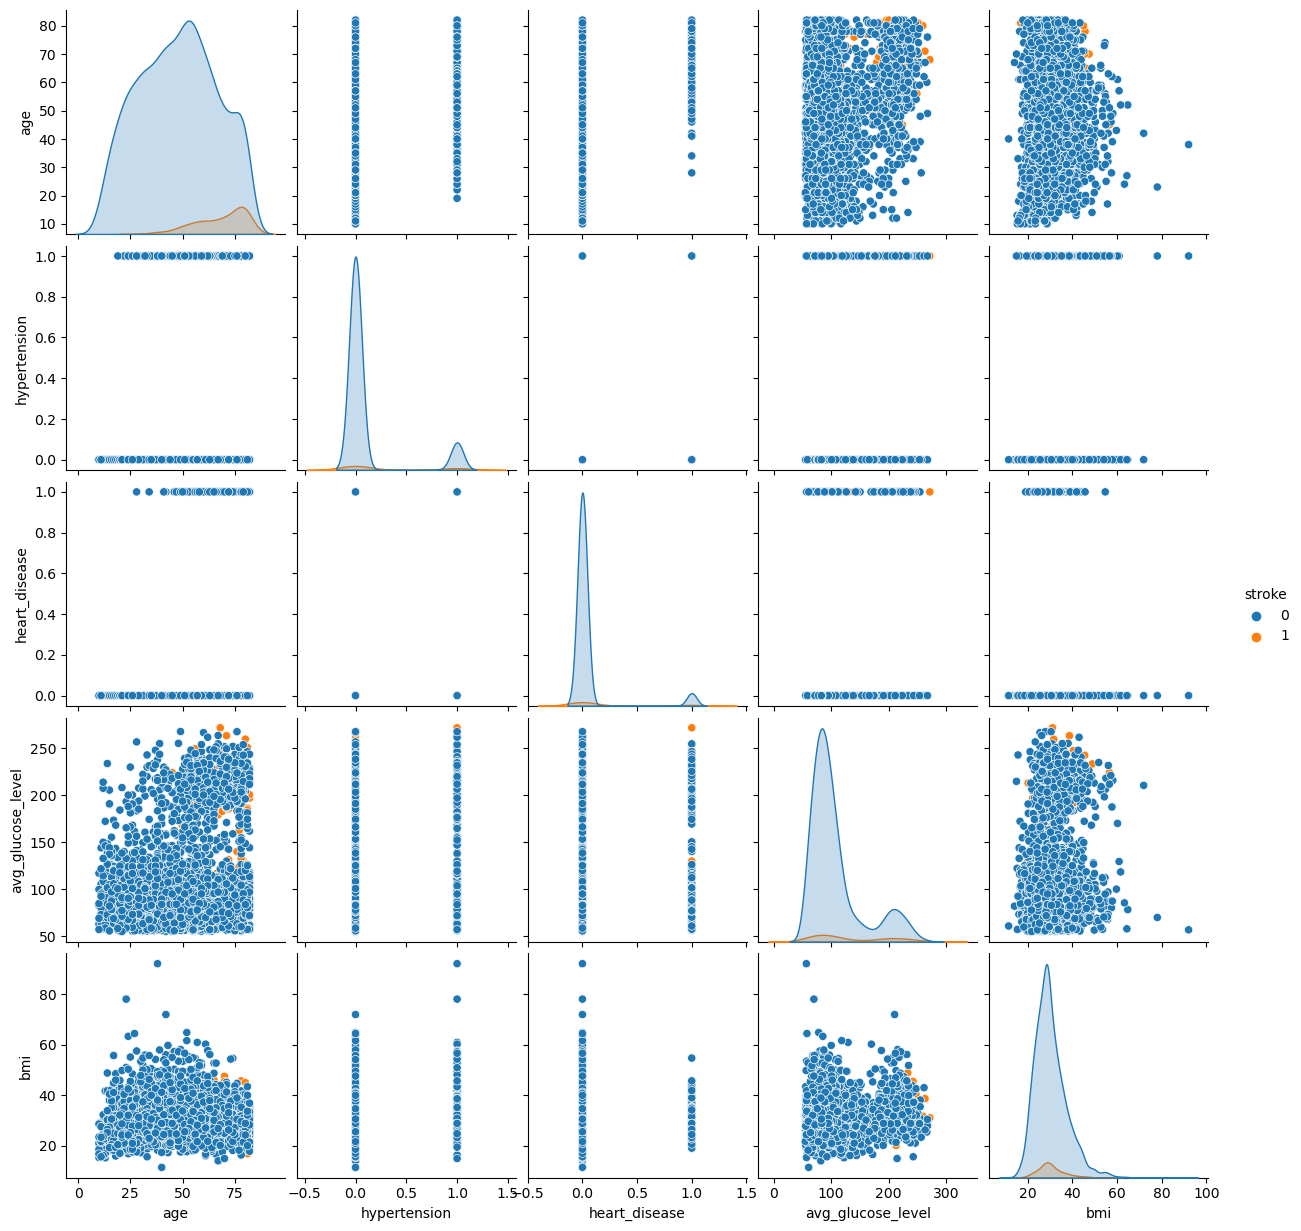

In [42]:
from matplotlib import pyplot  as plt
import seaborn as sns
sns.pairplot(data,diag_kind="kde",hue="stroke")

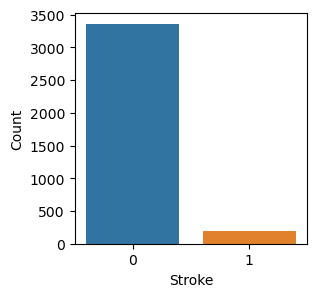

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1


In [43]:
stroke_label = data.stroke.value_counts()

plt.figure(figsize=(3, 3))
sns.barplot(x=stroke_label.index, y=stroke_label.values)  # Updated this line
plt.xlabel('Stroke', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()  # Add show to render the plot

data.head()

In [44]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = data[data.stroke==0]
df_2 = data[data.stroke==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=3364,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.stroke.value_counts()

1    3364
0    3363
Name: stroke, dtype: int64

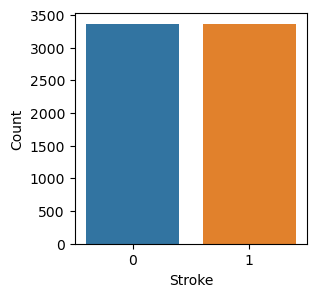

In [45]:
df_upsampled = df_upsampled.reset_index(drop=True)
stroke_label = df_upsampled.stroke.value_counts()

plt.figure(figsize=(3, 3))
sns.barplot(x=stroke_label.index, y=stroke_label.values)  # Updated line
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [46]:
final=pd.get_dummies(df_upsampled, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
final
# final.corr()['stroke'].sort_values(ascending=False)[1:]
# feature_final=final[['age','hypertension',	'heart_disease',	'avg_glucose_level',	'bmi',	'gender_female','gender_male','ever_married_no',	'ever_married_yes',	'work_type_children',	'work_type_govt_job',	'work_type_never_worked',	'work_type_private',	'work_type_self-employed',	'Residence_type_rural',	'Residence_type_urban',	'smoking_status_formerly_smoked',	'smoking_status_never_smoked',	'smoking_status_smokes']]
# target=final[["stroke"]]


final_features=final[['age', 'avg_glucose_level', 'bmi']]
target = final['stroke']

In [47]:
#Scaling the features using MinMax Scalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(final_features,target,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train.shape

(5381, 3)

In [49]:
X_test.shape

(1346, 3)

In [50]:
y_train.shape

(5381,)

In [51]:
y_test.shape

(1346,)

In [52]:
log_reg = LogisticRegression(C=0.1, max_iter=100).fit(X_train_scaled, y_train)
log_reg_pred= log_reg.score(X_test_scaled, y_test)

print("Training score: {:.3f}".format(log_reg.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(log_reg.score(X_test_scaled, y_test)))

log_reg_train_accuracy = log_reg.score(X_train_scaled,y_train)
log_reg_accuracy = log_reg.score(X_test_scaled,y_test)

pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)

Training score: 0.745
Test score: 0.755


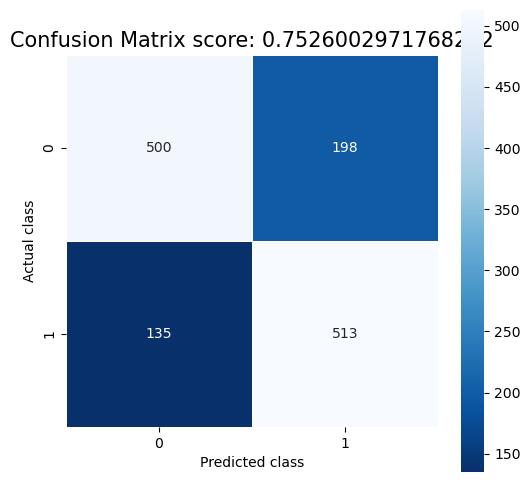

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       698
           1       0.72      0.79      0.75       648

    accuracy                           0.75      1346
   macro avg       0.75      0.75      0.75      1346
weighted avg       0.76      0.75      0.75      1346



In [53]:
log_reg_model=LogisticRegression(random_state=0)
log_reg_model.fit(X_train_scaled,y_train)
y_pred=log_reg_model.predict(X_test_scaled)
from sklearn import metrics

log_reg_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(log_reg_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual class');
plt.xlabel('Predicted class');
all_sample_title = 'Confusion Matrix score: '+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [54]:
tree = DecisionTreeClassifier(max_depth=20,random_state=0).fit(X_train_scaled, y_train)
print(tree.feature_importances_)
tree_pred= tree.score(X_test_scaled, y_test)

tree_train_accuracy =tree.score(X_train_scaled,y_train)
tree_accuracy = tree.score(X_test_scaled,y_test)
pred_prob_tree = tree.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test_scaled, y_test)))

[0.46697317 0.32845879 0.20456804]
Training score: 0.995
Test score: 0.970


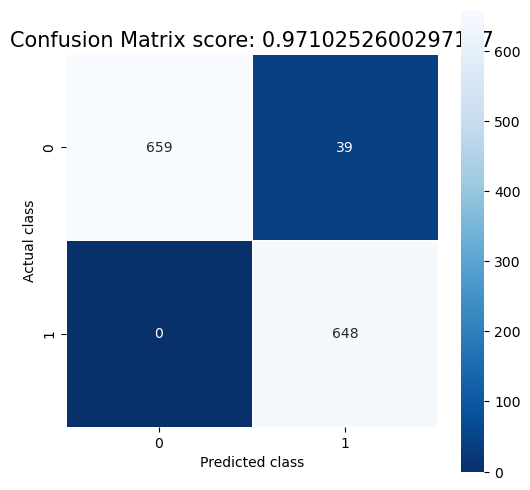

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       698
           1       0.94      1.00      0.97       648

    accuracy                           0.97      1346
   macro avg       0.97      0.97      0.97      1346
weighted avg       0.97      0.97      0.97      1346



In [55]:
tree_model=DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_scaled,y_train)
y_pred=tree_model.predict(X_test_scaled)
from sklearn import metrics

tree_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(tree_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual class');
plt.xlabel('Predicted class');
all_sample_title = 'Confusion Matrix score: '+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

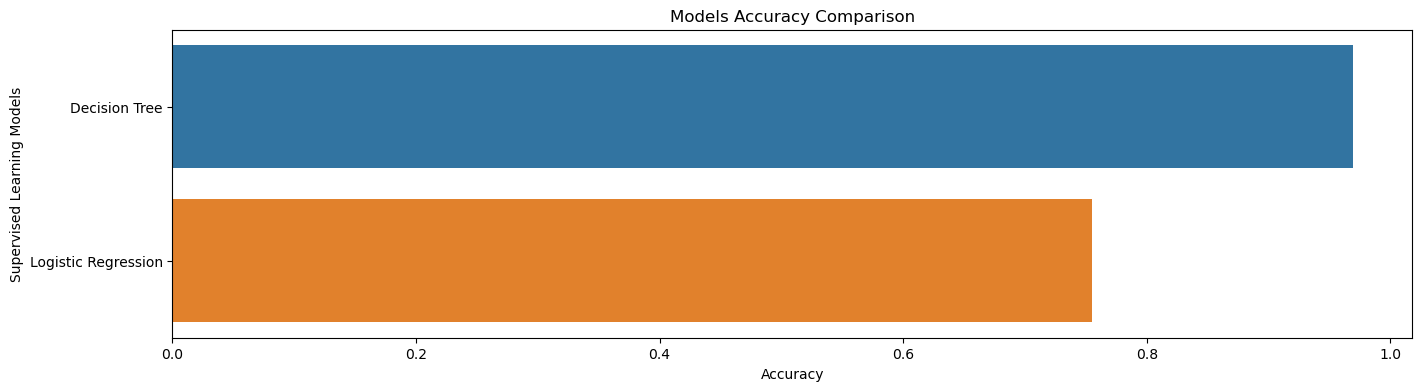

In [56]:
# Model_Name = ['Decision Tree', 'Logistic Regression']
# Accuracy = [tree_pred,log_reg_pred]
plt.figure(figsize=(16,4))
plt.title('Models Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Supervised Learning Models')
sns.barplot(x = [tree_pred,log_reg_pred],y = ['Decision Tree', 'Logistic Regression'])
plt.show()